# Data Wrangling 

This project about gathering data from twitter and analyze it.

## Gather

In [1]:
# import libraries 

# import numpy and pandas to munipulate data 
import numpy as np
import pandas as pd


#import matplotlib and seaborn for visualize the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

#import json for read json file
import json




In [2]:
#Creat dataframe from csv file " twitter-archive-enhanced "
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Create dataframe from tsv file "image-predictions"
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# Read JSON data then save it as DataFrame
tweet_list=[]
with open ('tweet-json.txt','r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        tweet_list.append({'tweet_id': status['id'],
                          'retweet_count': status['retweet_count'],
                          'favorite_count': status['favorite_count'],})
        
# Creat the dataframe 
df_3 = pd.DataFrame(tweet_list, columns = ['tweet_id','retweet_count','favorite_count'])

## Assess

In [5]:
#show dataframe
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#information about dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df_1[df_1['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [9]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
an             7
Bailey         7
Buddy          7
Daisy          7
Milo           6
Jack           6
Stanley        6
Rusty          6
Jax            6
Bella          6
Dave           6
Scout          6
Oscar          6
Leo            6
Koda           6
Bentley        5
            ... 
Blipson        1
Banditt        1
Ralphus        1
Striker        1
Puff           1
Franq          1
Rupert         1
Mona           1
Billl          1
Bertson        1
Jonah          1
Wafer          1
Ralphson       1
Mookie         1
Karll          1
Lolo           1
Brian          1
Yoda           1
Fido           1
Pherb          1
Ralf           1
Miguel         1
Zara           1
Zeus           1
Bodie          1
Rontu          1
Vinnie         1
Remy          

In [10]:
#show dataframe
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#information about dataframe
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [13]:
df_2.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
Samoyed                            20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [14]:
df_2.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [15]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#show dataframe
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
#information about dataframe
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
an             7
Bailey         7
Buddy          7
Daisy          7
Milo           6
Jack           6
Stanley        6
Rusty          6
Jax            6
Bella          6
Dave           6
Scout          6
Oscar          6
Leo            6
Koda           6
Bentley        5
            ... 
Blipson        1
Banditt        1
Ralphus        1
Striker        1
Puff           1
Franq          1
Rupert         1
Mona           1
Billl          1
Bertson        1
Jonah          1
Wafer          1
Ralphson       1
Mookie         1
Karll          1
Lolo           1
Brian          1
Yoda           1
Fido           1
Pherb          1
Ralf           1
Miguel         1
Zara           1
Zeus           1
Bodie          1
Rontu          1
Vinnie         1
Remy          

### Information
- df_1 = twitter-archive-enhanced
- df_2 = image-predictions
- df_3 = tweet-json

### Quality 
- for df_1 : 
- Names have "a"  , "an" , "o" which is not a name.
- The timestamp column is an object. It has to be a datetime object.
- contains retweets and which is duplicates for the data.
- wrong value at rating_numerator and rating_denominator.
- missing some expanded_urls.


- for df_2 : 
- inconsistent capitalization in p1 , p2 , p3.
- There are  more than 200 missing value since it has 2075 values insted of 2356.



- for df_3 : 
- There are 2 missing value since it has 2354 values insted of 2356.



### Tidiness

- one variable in four columns (doggo, floofer, pupper, and puppo) it should be in one column.
- there is a dirty data that should be cleaned in " doggo, floofer, pupper, and puppo " 
- There are many columns not needed such as " retweet " related columns.

## Clean

In [20]:
# Make copies to clean 
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

#### Define

- Names have "a"  , "an" , "o" which is not a name.
#### we will replace "a" , "an" , "o"with "None" if no name given.

#### Code

In [21]:
#  replace "a" with "None" .
df_1_clean['name'] = df_1_clean['name'].str.replace('a', 'None')
df_1_clean['name'] = df_1_clean['name'].str.replace('an', 'None')
df_1_clean['name'] = df_1_clean['name'].str.replace('o', 'None')

#### Test

In [22]:
# Check if there is no 'a' names
'a' in df_1_clean['name']
'an' in df_1_clean['name']
'o' in df_1_clean['name']

False

#### Define

- The timestamp column is an object. It has to be a datetime object.
#### replace it from an object to datetime object.


#### Code

In [23]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [24]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define

- contains retweets and which is duplicates for the data.
#### Delete retweets.

#### Code

In [25]:
df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

#### Test

In [26]:
len(df_1_clean[df_1_clean.retweeted_status_id.isnull() == False])

0

#### Define

- wrong value at rating_numerator and rating_denominator.
#### i will change the type of rating_numerator to be float
#### i will consider the wrong value at rating_numerator as outliers so , i will drop them 
#### I will remove any denominator not equal to 10 , since it will lead me to wrong value.
#### I will creat a new coulmn names as " Rating " to know the actual value of rating. 




#### Code

In [27]:
df_1_clean['rating_numerator'] = df_1_clean['rating_numerator'].astype('float')

In [28]:
outliers = [75,0,26,27,1776,420]
df_1_clean = df_1_clean[~df_1_clean['rating_numerator'].isin(outliers)]

In [29]:
df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
1689,I've been told there's a slight possibility he...,5.0


In [30]:
# List of problem entries (entries starts at 0)
problem_entries_indexes = [x-1 for x in [46,1690]]
problem_entries = df_1_clean.iloc[problem_entries_indexes]

df_1_clean.at[problem_entries_indexes[0], 'rating_numerator'] = 13.5
df_1_clean.at[problem_entries_indexes[0], 'rating_denominator'] = 10

df_1_clean.at[problem_entries_indexes[1], 'rating_numerator'] = 9.5
df_1_clean.at[problem_entries_indexes[1], 'rating_denominator'] = 10



#### Test

In [31]:
df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5
1689,I've been told there's a slight possibility he...,9.5


In [32]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2167 non-null int64
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2167 non-null datetime64[ns]
source                        2167 non-null object
text                          2167 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2110 non-null object
rating_numerator              2167 non-null float64
rating_denominator            2167 non-null int64
name                          2167 non-null object
doggo                         2167 non-null object
floofer                       2167 non-null object
pupper                        2167 non-null object
puppo                         2167 non-null object
dtypes: datetime64[ns](1), f

In [33]:
df_1_clean.iloc[46]

tweet_id                                                     882762694511734784
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-06 00:46:41
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Gus. He's quite the cheeky pupper. Alr...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/882762694...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

#### Code

In [34]:
df_1_clean = df_1_clean[df_1_clean.rating_denominator == 10]

#### Test

In [35]:
df_1_clean.rating_denominator.value_counts()

10    2145
Name: rating_denominator, dtype: int64

In [36]:
# create Rating
df_1_clean['rating'] = df_1_clean['rating_numerator'] / df_1_clean['rating_denominator']


In [37]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,PhineNNonenes,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,DNNonenerlNNonene,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,FrNNonenenklin,None,None,None,None,1.2


#### Define

- missing some expanded_urls.
#### i will use tweet_id to get expanded_urls


#### Code

In [38]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
df_1_clean = df_1_clean.apply(add_urls, axis=1)


In [39]:
df_1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2145 non-null int64
in_reply_to_status_id         71 non-null float64
in_reply_to_user_id           71 non-null float64
timestamp                     2145 non-null datetime64[ns]
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2145 non-null object
rating_numerator              2145 non-null float64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
rating                     

#### Define

- inconsistent capitalization in p1 , p2 , p3.
#### Make them lower case.

#### Code

In [40]:
df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

#### Test

In [41]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define

- There are  more than 200 missing value since it has 2075 values insted of 2356.
#### merging data from image prediction  into a copy of twitter archive if the image prediction's tweet is already found in the twitter archive



#### Code

In [42]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_1_clean
df2 = df_2_clean

df_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [43]:
# If tweet id from df_2 not in df_1, then it will not be in the final dataframe

tweet_ids = df_2_clean.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in archive
    if tweet_id not in df_1_clean.tweet_id.values:
        # Check that it also isn't in new df
        if tweet_id in df_final.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))

#### Define

- There are 2 missing value since it has 2354 values insted of 2356.
#### Merge data from tweet info into a final dataframe if the tweet info's tweet is already found in the final dataframe.


#### Code

In [44]:
# Only keep predictions that have ids in archive 
df1 = df_final
df2 = df_3_clean
df2.rename(columns={'id':'tweet_id'}, inplace=True)

df_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [45]:
# If tweet id from df_3 not in df_1, Then it will not be final merged dataframe
tweet_ids = df_3_clean.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in new df
    if tweet_id not in df_1_clean.tweet_id.values:
        # Test if id is also in new df
        if tweet_id in df_final.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2144
Data columns (total 31 columns):
tweet_id                      2145 non-null int64
in_reply_to_status_id         71 non-null float64
in_reply_to_user_id           71 non-null float64
timestamp                     2145 non-null datetime64[ns]
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2145 non-null object
rating_numerator              2145 non-null float64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
rating                     

### Tidiness
### df_final

- one variable in four columns (doggo, floofer, pupper, and puppo)


#### Define

#### Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value. 




#### Code

In [46]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
df_final['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_final = df_final.apply(get_dog_stage, axis=1)


In [47]:
# Drop these columns to make data more consistent
df_final = df_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [48]:
df_final.dog_stage.value_counts()

None             1802
pupper            223
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [49]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,None


#### Define 

- There are many columns not needed that cuse a missi dataframe.
#### drop empty columns

#### Code

In [50]:
empty_columns = ['retweeted_status_id',
                 'retweeted_status_user_id',
                 'retweeted_status_timestamp',
                 'in_reply_to_status_id',
                 'in_reply_to_user_id',
                 'source',
                 'text',]
df_final = df_final.drop(empty_columns, axis=1)


#### Test

In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2144
Data columns (total 21 columns):
tweet_id              2145 non-null int64
timestamp             2145 non-null datetime64[ns]
expanded_urls         2145 non-null object
rating_numerator      2145 non-null float64
rating_denominator    2145 non-null int64
name                  2145 non-null object
rating                2145 non-null float64
jpg_url               1969 non-null object
img_num               1969 non-null float64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null object
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null object
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null object
retweet_count         2145 non-null int64
favorite_count        2145 non-null int64
dog_stage             2

#### Store Data
- store the final and clean dataframe into a CSV file twitter_archive_master.csv



In [52]:
# Store data on tweet_json.txt
df_final.to_csv('twitter_archive_master.csv')


#### (Visualizations and Analyses)

In [53]:
df = pd.read_csv('twitter_archive_master.csv')
# change the timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

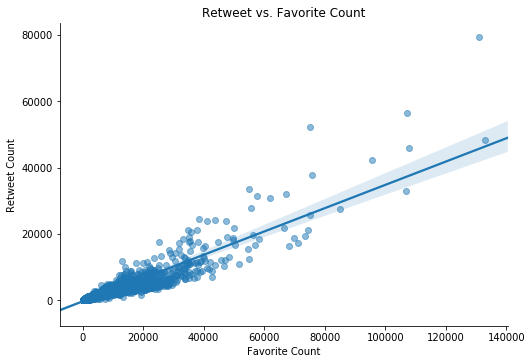

In [54]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="favorite_count", 
           y="retweet_count", 
           data=df_final,
           size = 5,
           aspect=1.5,
           scatter_kws={'alpha':0.5})
plt.title('Retweet vs. Favorite Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

In [55]:
np.corrcoef(df['retweet_count'],df['favorite_count'])

array([[ 1.        ,  0.91200436],
       [ 0.91200436,  1.        ]])

#### There is a posative correlation btween Favorite and Retweet , that means when the retweet increse the favorite increses too. 


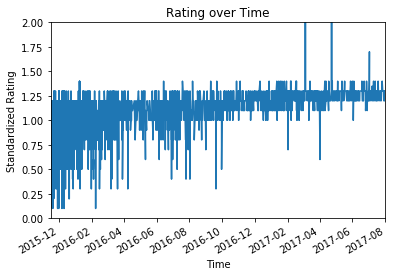

In [56]:
# Plot standardized ratings over time
df_final.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

#### This is the rating over time , i notice that there is an outliers , which is more than 2 
#### So i will try to fix this proplem.

In [57]:
df_final.loc[df_final['rating'] > 2]

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
162,855860136149123072,2017-04-22 19:05:32,https://twitter.com/dog_rates/status/855860136...,666.0,10,NNonene,66.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058,4407,None
245,838150277551247360,2017-03-04 22:12:52,https://twitter.com/dog_rates/status/838150277...,182.0,10,NNonene,18.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,1824,None


#### Define 

#### drop these index which have value more than 2

#### Code

In [58]:
# drop index
df_final = df_final.drop(df_final.index[162])

In [59]:
# drop index
df_final = df_final.drop(df_final.index[244])

#### Test

In [60]:
df_final.iloc[160:163]

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
160,856288084350160898,2017-04-23 23:26:03,https://twitter.com/dog_rates/status/856288084...,14.0,10,NNonene,1.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,545,None
161,856282028240666624,2017-04-23 23:01:59,https://twitter.com/dog_rates/status/856282028...,14.0,10,Cermet,1.4,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4.0,chihuahua,...,True,italian_greyhound,0.032962,True,cardigan,0.020776,True,6841,29086,None
163,855857698524602368,2017-04-22 18:55:51,https://twitter.com/perfy/status/8558573181681...,13.0,10,NNonene,1.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2313,12498,None


In [61]:
df_final.iloc[242:246]

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
243,838561493054533637,2017-03-06 01:26:54,https://twitter.com/dog_rates/status/838561493...,13.0,10,WNNonenelter,1.3,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1.0,kelpie,...,True,doormat,0.139994,False,dalmatian,0.132820,True,1504,11892,None
244,838476387338051585,2017-03-05 19:48:43,https://twitter.com/dog_rates/status/838476387...,13.0,10,StNNonenenley,1.3,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3.0,great_pyrenees,...,True,kuvasz,0.001001,True,newfoundland,0.000405,True,5484,24664,None
246,838085839343206401,2017-03-04 17:56:49,https://twitter.com/dog_rates/status/838085839...,15.0,10,NNonene,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150,None
247,838083903487373313,2017-03-04 17:49:08,https://twitter.com/dog_rates/status/838083903...,13.0,10,DNNoneneisy,1.3,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2.0,chow,...,True,seat_belt,0.164133,False,pomeranian,0.017981,True,3582,19183,None


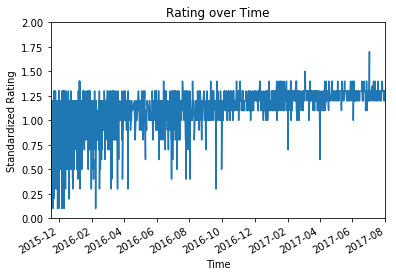

In [62]:
# Plot standardized ratings over time
df_final.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;